In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/spam.csv",encoding='latin1')
df.sample(5)   # random sample of 5 data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3595,ham,Good morning princess! Happy New Year!,NaN,NaN,NaN
4425,ham,Was it something u ate?,NaN,NaN,NaN
1590,ham,Somewhr someone is surely made 4 u. And God ha...,NaN,NaN,NaN
2443,ham,&lt;#&gt; great loxahatchee xmas tree burning...,NaN,NaN,NaN
561,ham,Thanx 4 e brownie it's v nice...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# in unnamed 2,3,4 column almost all values are missing reove those three column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True) 
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [ ]:
# let's rename the column name for better understanding
df = df.rename(columns={'v1':'target','v2':'text'})
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [ ]:
# label should be in numeric format so let me apply labelencoder to convert it in numeric
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print(df.shape)
print(df.isnull().sum())
print(df.duplicated().sum())

(5572, 2)
target    0
text      0
dtype: int64
403


In [ ]:
# in this dataset don't have any missing value but 403 rows are duplicate so, first remove those rows
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [ ]:

print(df.duplicated().sum())

0


**📈Exploratory Data Analysis :-**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

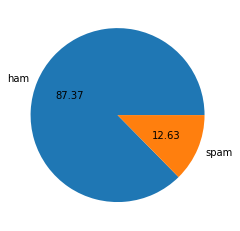

In [ ]:
# pie plot of ham and spam msgs
plt.pie(df['target'].value_counts(),labels=('ham','spam'),autopct='%0.2f')
plt.show()

In [ ]:

# from this pie chat clearly visisble it is an imbalance datset, spam data is very less.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# let's calculate number of chercters present in per rows..
df['num_cheracters'] = df['text'].apply(len)
df.tail(5)

,target,text,num_cheracters
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125
5571,0,Rofl. Its true to its name,26


In [ ]:
# now lets calculat number of words present in per words....
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,target,text,num_cheracters,num_words
995,0,Change again... It's e one next to escalator...,47,11
1718,0,"As in missionary hook up, doggy hook up, stand...",53,13
3528,1,Xmas & New Years Eve tickets are now on sale f...,157,38
3157,0,Thank u. IT BETTER WORK OUT CAUSE I WILL FEEL ...,60,13
4261,0,You'll never believe this but i have actually ...,69,15


In [ ]:
# now lets calculate the number of sentence per rows...
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))  # number of sentence per rows
df.sample(5)

,target,text,num_cheracters,num_words,num_sentences
5040,0,She ran off with a younger man. we will make p...,70,16,2
4172,0,Ok... But they said i've got wisdom teeth hidd...,77,18,2
2586,0,If you don't respond imma assume you're still ...,82,17,1
1188,0,All will come alive.better correct any good lo...,73,12,1
256,0,Mmm so yummy babe ... Nice jolt to the suzy,43,10,1


In [ ]:
df[df['target']==0][['num_cheracters','num_words','num_sentences']]

,num_cheracters,num_words,num_sentences
0,111,24,2
1,29,8,2
3,49,13,1
4,61,15,1
6,77,18,2
...,...,...,...
5565,12,4,1
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [ ]:

df[df['target']==0][['num_cheracters','num_words','num_sentences']].describe()

,num_cheracters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
df[df['target']==1][['num_cheracters','num_words','num_sentences']]

,num_cheracters,num_words,num_sentences
2,155,37,2
5,148,39,4
8,158,32,5
9,154,31,3
11,136,31,3
...,...,...,...
5537,90,18,3
5540,160,38,6
5547,160,35,5
5566,147,30,1


In [ ]:
df[df['target']==1][['num_cheracters','num_words','num_sentences']].describe()

,num_cheracters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


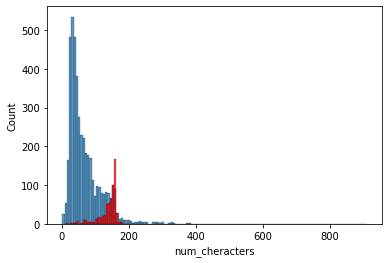

In [ ]:
sns.histplot(df[df['target']==0]['num_cheracters'])
sns.histplot(df[df['target']==1]['num_cheracters'],color='red')

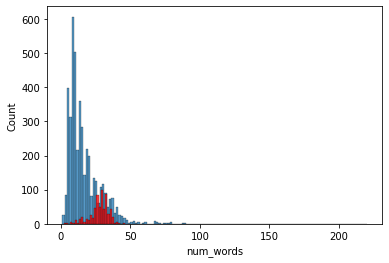

In [ ]:

sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

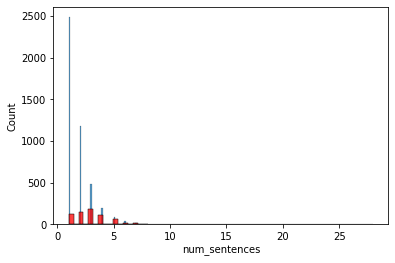

In [ ]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

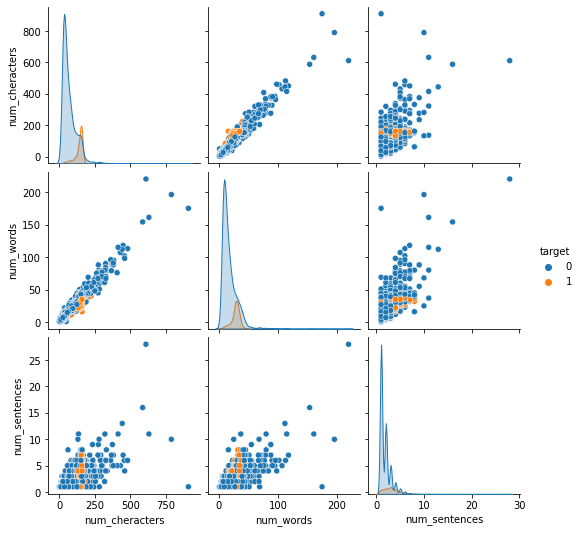

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:

# lets check the correlation 
df.corr()

,target,num_cheracters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_cheracters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


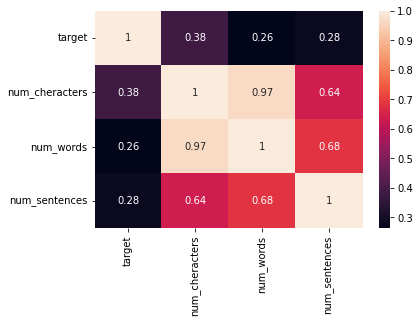

In [ ]:

# plot correlation 
sns.heatmap(df.corr(),annot=True)

In [ ]:
# note : In time of model building if i added one manually created columns the i will go for num_cheracters column
# bcz it's having a strong correlation rather than others two.

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
# let's define a function that will be do all the above operation at a time
def text_transform(text):
    text = text.lower()  # lower case of all letters
    text = nltk.word_tokenize(text)   # separate the words
    
    y = []
    for i in text:
        if i.isalnum():       
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:   # stopwords and punctuation remove
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))    # stem the all words 
        
    return " ".join(y)   # at last join all words in a string

In [ ]:
import string
string.punctuation   # punctuation list

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'